Dataset shape: (1797, 64)
Number of classes: 10
Explained variance ratio: [0.12033916 0.09561054]
Cumulative explained variance: [0.12033916 0.21594971]


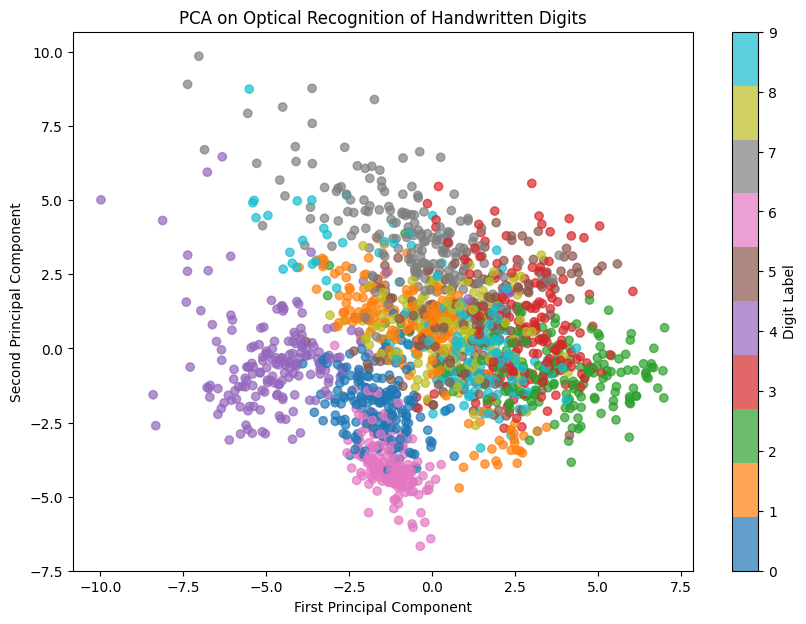

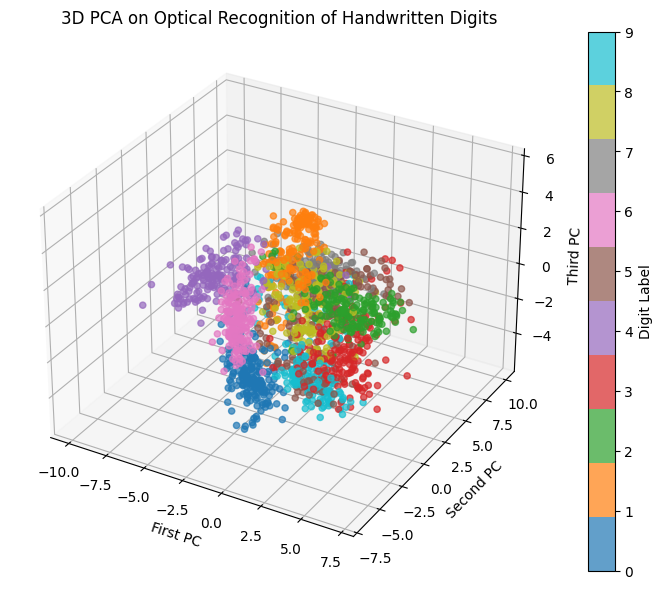

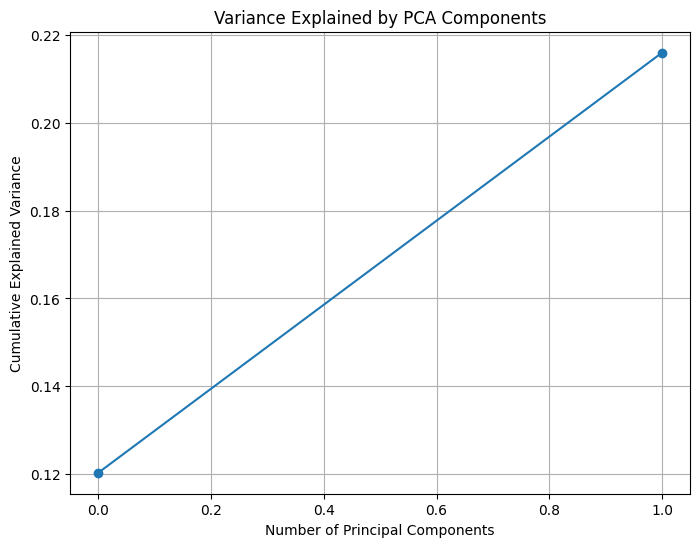

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the Digits Dataset
digits = load_digits()
X = digits.data  # Features (images flattened into a 64-dimensional array)
y = digits.target  # Labels (the corresponding digit)

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Step 5: 2D Scatter Plot of PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Optical Recognition of Handwritten Digits')
plt.colorbar(scatter, label='Digit Label')
plt.show()

# Step 6: 3D PCA Visualization (Optional)
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', alpha=0.7)
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
plt.title('3D PCA on Optical Recognition of Handwritten Digits')
plt.colorbar(scatter, label='Digit Label')
plt.show()

# Step 7: Variance Explained Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()
